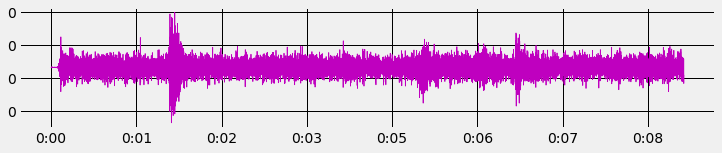

In [21]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
 
def format_time(x, pos=None):
    global duration, nframes, k
    progress = int(x / float(nframes) * duration * k)
    mins, secs = divmod(progress, 60)
    hours, mins = divmod(mins, 60)
    out = "%d:%02d" % (mins, secs)
    if hours > 0:
        out = "%d:" % hours
    return out
 
def format_db(x, pos=None):
    if pos == 0:
        return ""
    global peak
    if x == 0:
        return "-inf"
 
    db = 20 * math.log10(abs(x) / float(peak))
    return int(db)
 
wav = wave.open(".wav")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
 
duration = nframes / framerate
w, h = 800, 300
k = int(nframes/w/32)
DPI = 72
peak = 256 ** sampwidth / 2
 
content = wav.readframes(nframes)
samples = np.fromstring(content, dtype=types[sampwidth])
 
plt.figure(1, figsize=(float(w)/DPI, float(h)/DPI), dpi=DPI)
plt.subplots_adjust(wspace=0, hspace=0)
 
for n in range(nchannels):
    channel = samples[n::nchannels]
    #channel = channel[0::k]
    if nchannels == 1:
        channel = channel - peak
 
    axes = plt.subplot(2, 1, n+1)
    axes.plot(channel, "m",linewidth=0.8)
    axes.yaxis.set_major_formatter(ticker.FuncFormatter(format_db))
    plt.grid(True, color="black")
    axes.xaxis.set_major_formatter(ticker.NullFormatter())
axes.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
plt.savefig("wave", dpi=DPI)
plt.show()

In [19]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import statsmodels
import statsmodels.api as sm
import statsmodels
import pandas as pd
import warnings
from tqdm import tqdm 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
def to_sprectrogram(z):
    types = {
        1: np.int8,
        2: np.int16,
        4: np.int32
    }

    def format_time(x, pos=None):
        global duration, nframes, k
        progress = int(x / float(nframes) * duration * k)
        mins, secs = divmod(progress, 60)
        hours, mins = divmod(mins, 60)
        out = "%d:%02d" % (mins, secs)
        if hours > 0:
            out = "%d:" % hours
        return out

    def format_db(x, pos=None):
        if pos == 0:
            return ""
        global peak
        if x == 0:
            return "-inf"

        db = 20 * math.log10(abs(x) / float(peak))
        return int(db)

    wav = wave.open(z)
    (nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()

    duration = nframes / framerate
    w, h = 800, 300
    k = int(nframes/w/32)
    DPI = 72
    peak = 256 ** sampwidth / 2

    content = wav.readframes(nframes)
    samples = np.fromstring(content, dtype=types[sampwidth])

    plt.figure(1, figsize=(float(w)/DPI, float(h)/DPI), dpi=DPI)
    plt.subplots_adjust(wspace=0, hspace=0)

    for n in range(nchannels):
        channel = samples[n::nchannels]
        #channel = channel[0::k]
        if nchannels == 1:
            channel = channel - peak

        axes = plt.subplot(2, 1, n+1)
        axes.plot(channel, "m",linewidth=0.8)
        axes.yaxis.set_major_formatter(ticker.FuncFormatter(format_db))
        plt.grid(True, color="black")
        axes.xaxis.set_major_formatter(ticker.NullFormatter())
    axes.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    plt.show()
    plt.savefig("wave", dpi=DPI)
    return pd.DataFrame({'Frequency': pd.Series(channel), 'Time': pd.Series([i for i in range(1, len(channel)+1)])})
data = to_sprectrogram('play.wav')
data = data.drop(['Time'],axis=1)
print(data)

Error: file does not start with RIFF id

In [3]:
data.head()

,Frequency
0,-32768.0
1,-32768.0
2,-32768.0
3,-32768.0
4,-32768.0


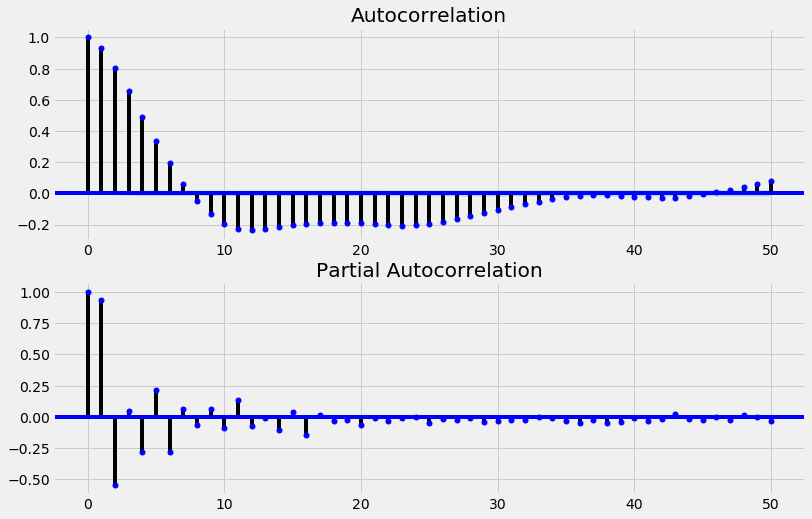

In [4]:
def Draw_autcorrelation(data,c = 'b'):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(data, lags=50, ax=ax1,color=c)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(data, lags=50, ax=ax2,color=c)
    plt.show()
Draw_autcorrelation(data)

In [5]:
df = pd.read_csv('workpls.csv', sep = ',', error_bad_lines=False)


b'Skipping line 8835: expected 4 fields, saw 5\n'
b'Skipping line 535881: expected 4 fields, saw 7\n'


In [6]:
df.columns = ['ItemID','Sentiment','SentimentSource','SentimentText']

In [7]:
df

,ItemID,Sentiment,SentimentSource,SentimentText
0,2,0,Sentiment140,I missed the New Moon trail...
1,3,1,Sentiment140,omg its already 7:30 :O
2,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
3,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
4,6,0,Sentiment140,or i just worry too much?
5,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
6,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...
7,9,1,Sentiment140,handed in my uniform today . i miss you ...
8,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)
9,11,0,Sentiment140,I must think about positive..


In [8]:
plus = 0
minus = 0
for i in tqdm(range(len(df))):
    if df['Sentiment'][i] == 1:
        plus += 1
    else:
        minus += 1
print(plus)
print(minus)

100%|█████████████████████████████████████████████████████████████████████| 1578611/1578611 [01:23<00:00, 18872.18it/s]


790177
788434


In [9]:
from copy import copy
l = copy(df['SentimentText'][:10000])
for i in tqdm(range(10000)):
    l[i] = len(l[i].split())

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 42552.00it/s]


In [14]:
l = pd.Series(np.sort(np.array(l)))

In [15]:
df_new = pd.DataFrame({'Sentiment' : df['Sentiment'][:10000], 'Num' : l})

In [16]:
df_new

,Sentiment,Num
0,0,1
1,1,1
2,0,1
3,0,1
4,0,1
5,1,1
6,0,1
7,1,1
8,1,1
9,0,1


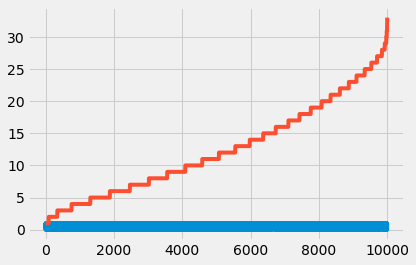

In [17]:
plt.plot(df_new)

In [4]:
import torch
import torchvision

In [16]:
import os
thisFile = "work.mp3"
base = os.path.splitext(thisFile)[0]
os.rename(thisFile, base + ".wav")